In [9]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [10]:
x = pickle.load(open('F:\\my project\\dataset\\pickle\\face_airpalne.pickle_data.pickle', 'rb'))
y = pickle.load(open('F:\\my project\\dataset\\pickle\\face_airpalne.pickle_lable.pickle', 'rb'))

In [11]:
x = x.reshape(-1, 60, 60, 1)

In [12]:
x.shape

(6749, 60, 60, 1)

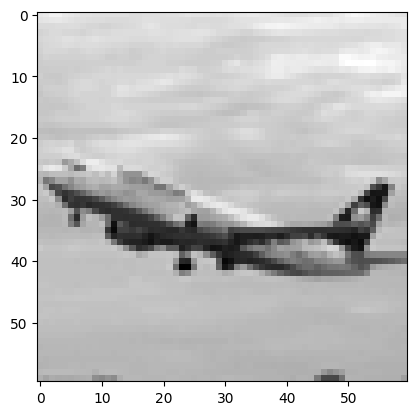

In [13]:
plt.imshow(x[6000], cmap='gray')

In [14]:
y.shape

(6749,)

In [15]:
x = x / 255

In [17]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.callbacks import TensorBoard
import time

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=x.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [19]:
model.add(tf.keras.layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [20]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.fit(x, y, batch_size=1300, epochs=10, validation_split=0.05)

Epoch 1/10
5/5 [==============================] - 48s 8s/step - loss: 0.0673 - accuracy: 0.9944 - val_loss: 0.6819 - val_accuracy: 0.9112
Epoch 2/10
5/5 [==============================] - 38s 8s/step - loss: 0.0659 - accuracy: 0.9966 - val_loss: 0.6521 - val_accuracy: 0.9615
Epoch 3/10
5/5 [==============================] - 38s 8s/step - loss: 0.0618 - accuracy: 0.9988 - val_loss: 0.4609 - val_accuracy: 0.9704
Epoch 4/10
5/5 [==============================] - 37s 7s/step - loss: 0.0321 - accuracy: 0.9994 - val_loss: 0.1289 - val_accuracy: 0.9882
Epoch 5/10
5/5 [==============================] - 37s 7s/step - loss: 0.0097 - accuracy: 0.9991 - val_loss: 0.1240 - val_accuracy: 0.9586
Epoch 6/10
5/5 [==============================] - 38s 8s/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.0540 - val_accuracy: 0.9882
Epoch 7/10
5/5 [==============================] - 37s 7s/step - loss: 0.0050 - accuracy: 0.9995 - val_loss: 0.0869 - val_accuracy: 0.9734
Epoch 8/10
5/5 [==================

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 64)        640       
                                                                 
 activation (Activation)     (None, 58, 58, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 27, 27, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                    

In [25]:
model.save('F:\\my project\\dataset\\models\\' + 'airpalne_face_recognize_64_3_CNN.model')

INFO:tensorflow:Assets written to: F:\my project\dataset\models\airpalne_face_recognize_64_3_CNN.model\assets


INFO:tensorflow:Assets written to: F:\my project\dataset\models\airpalne_face_recognize_64_3_CNN.model\assets


In [26]:
x[-2].shape

(60, 60, 1)

In [27]:
model.predict(x[-3].reshape(-1, 60, 60, 1))

1/1 [==============================] - 0s 165ms/step


array([[0.9993407]], dtype=float32)

In [28]:
import random

In [29]:
x.shape

(6749, 60, 60, 1)

In [30]:
mask = np.array([bool(random.randint(0, 1)) for i in range(x.shape[0])])

In [31]:
mask

array([ True, False,  True, ..., False,  True,  True])

In [32]:
mask2 = np.array([bool(1 - i) for i in mask])
mask2

array([False,  True, False, ...,  True, False, False])

In [33]:
x_train = x[mask]
x_test = x[mask2]
y_train = y[mask]
y_test = y[mask2]

In [34]:
x_train.shape

(3346, 60, 60, 1)

In [35]:
x_test.shape

(3403, 60, 60, 1)

In [36]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=x.shape[1:]))
model2.add(tf.keras.layers.Activation('relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [37]:
model2.add(tf.keras.layers.Conv2D(64, (3, 3)))
model2.add(tf.keras.layers.Activation('relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [38]:
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(64))
model2.add(tf.keras.layers.Activation('relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#model2.add(Activation('sigmoid'))

In [39]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
model2.fit(x_train, y_train, batch_size=600, epochs=10, validation_split=0.05)

Epoch 1/10
6/6 [==============================] - 21s 3s/step - loss: 0.4367 - accuracy: 0.7492 - val_loss: 2.3515 - val_accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 18s 3s/step - loss: 0.3152 - accuracy: 0.8949 - val_loss: 1.7860 - val_accuracy: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 19s 3s/step - loss: 0.2642 - accuracy: 0.8949 - val_loss: 1.3539 - val_accuracy: 0.0000e+00
Epoch 4/10
6/6 [==============================] - 21s 3s/step - loss: 0.1991 - accuracy: 0.8965 - val_loss: 1.0050 - val_accuracy: 0.2798
Epoch 5/10
6/6 [==============================] - 22s 4s/step - loss: 0.1388 - accuracy: 0.9481 - val_loss: 0.6229 - val_accuracy: 0.7798
Epoch 6/10
6/6 [==============================] - 18s 3s/step - loss: 0.0961 - accuracy: 0.9726 - val_loss: 0.4630 - val_accuracy: 0.8036
Epoch 7/10
6/6 [==============================] - 18s 3s/step - loss: 0.0659 - accuracy: 0.9805 - val_loss: 0.2582 - val_accuracy: 0.8869
Epoch 8/10
6/6 [======

In [41]:
model2.evaluate(x_test, y_test)

107/107 [==============================] - 7s 65ms/step - loss: 0.0444 - accuracy: 0.9871


[0.04438735172152519, 0.9870702028274536]

In [47]:
model2.predict(x[-10].reshape(-1, 60, 60, 1))

1/1 [==============================] - 0s 39ms/step


array([[0.9947367]], dtype=float32)

In [49]:
def meaning(num: int):
    if num < 0.5:
        return 0
    elif num >= 0.5:
        return 1
    else:
        return None

In [50]:
category={0:'face',1:'airplane'}

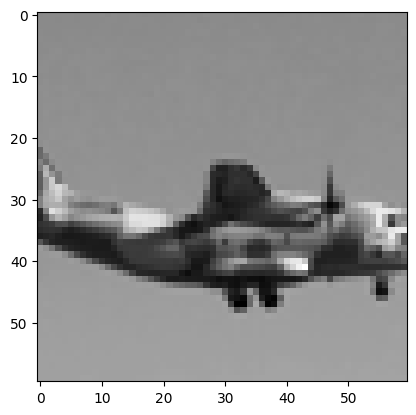

In [48]:
plt.imshow(x[-10], cmap='gray')


In [106]:
model2.save('F:\\my project\\dataset\\models\\' + 'airpalne_face_recognize_64_3_CNN2.model')

INFO:tensorflow:Assets written to: F:\my project\dataset\models\airpalne_face_recognize_64_3_CNN2.model\assets


INFO:tensorflow:Assets written to: F:\my project\dataset\models\airpalne_face_recognize_64_3_CNN2.model\assets


In [51]:
predict=model2.predict(x_test)

107/107 [==============================] - 7s 66ms/step


In [52]:
predict

array([[9.3188020e-04],
       [3.9091546e-04],
       [1.3823246e-04],
       ...,
       [9.9364638e-01],
       [9.8712665e-01],
       [9.8812878e-01]], dtype=float32)

In [53]:
for i,j in enumerate(predict):
    predict[i]=meaning(j)

In [54]:
predict

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [55]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [58]:
type(y_test),type(predict)

(numpy.ndarray, numpy.ndarray)

In [60]:
y_test.shape,predict.shape

((3403,), (3403, 1))

In [62]:
predict=predict.reshape((3403,))
predict.shape

(3403,)

In [65]:
predict

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [66]:
m=np.array([predict[i]**y_test[i] for i in range(len(predict))])

In [67]:
m

array([1., 1., 1., ..., 1., 1., 1.])

In [69]:
acc=np.sum(m)/len(y_test)
acc

0.9894210990302674

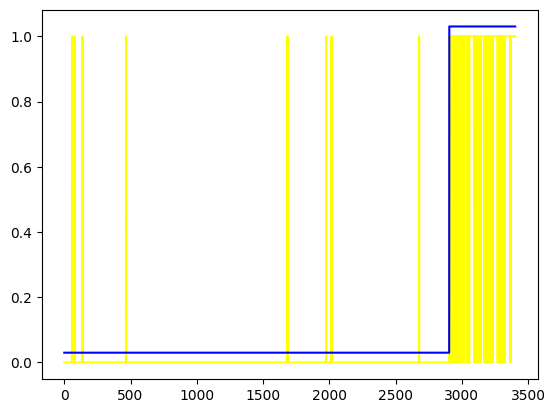

In [81]:
plt.plot(predict,c='yellow')
plt.plot(y_test+0.03,c='blue')

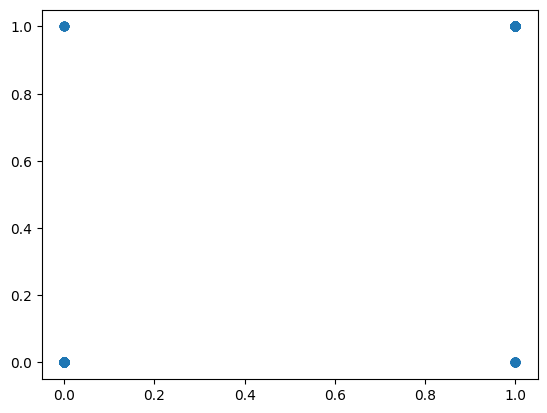

In [71]:
plt.scatter(y_test,predict)

In [72]:
import seaborn as sb

In [82]:
#sb.swarmplot(x=y_test,y=predict,size=0.5)

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y_test,predict)

array([[2897,    8],
       [  36,  462]], dtype=int64)